# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

- `age` - idade dos pacientes
- `gender` - genero (2 mulheres) (1 homens)
- `height` - altura dos pacientes
- `weight` - peso dos pacientes
- `cholesterol`- 1: baixo / 2: medio / 3: alto

- `gluc` - glicose
- `smoke` - fumante (1) não fumante (0)
- `alco` - consume alcool (1) não consome (0)
- `active` - realiza atividades fisicas (1) não realiza (0)
- `cardio_disease` - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [ ]:
# BIBLIOTECAS UTILIZADAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [2]:
# CARREGANDO O DATASET
df = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [3]:
# CONFERINDO PRIMEIRAS LINHAS DO DATASET
df.head(3)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1


In [4]:
# VERIFICANDO TIPOS DE VARIÁVEIS
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [5]:
# CORREÇÕES 
df['weight'] = df['weight'].str.replace(',', '.').astype(float)
df.columns = df.columns.str.upper()
df = df.rename(columns={'ALCO': 'ALCOOL'})
df = df.rename(columns={'GLUC': 'GLUCOSE'})

In [6]:
# VERIFICANDO TIPOS DE VARIÁVEIS APÓS CORREÇÕES
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             10000 non-null  int64  
 1   GENDER          10000 non-null  int64  
 2   HEIGHT          10000 non-null  int64  
 3   WEIGHT          10000 non-null  float64
 4   CHOLESTEROL     10000 non-null  int64  
 5   GLUCOSE         10000 non-null  int64  
 6   SMOKE           10000 non-null  int64  
 7   ALCOOL          10000 non-null  int64  
 8   ACTIVE          10000 non-null  int64  
 9   CARDIO_DISEASE  10000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


In [7]:
# CONFERINDO VALORES FALTANTES
print("Número de dados faltantes:")
df.isnull().mean()*100

Número de dados faltantes:


AGE               0.0
GENDER            0.0
HEIGHT            0.0
WEIGHT            0.0
CHOLESTEROL       0.0
GLUCOSE           0.0
SMOKE             0.0
ALCOOL            0.0
ACTIVE            0.0
CARDIO_DISEASE    0.0
dtype: float64

## 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


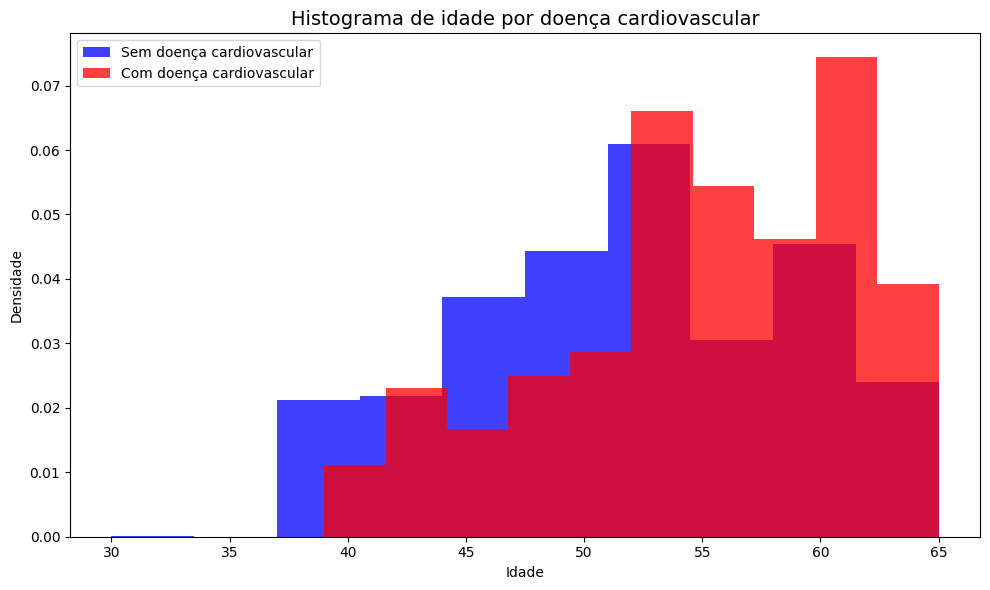

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df[df['CARDIO_DISEASE'] == 0]['AGE'], bins=10, color='blue', alpha = 0.75, label='Sem doença cardiovascular', density=True)
plt.hist(df[df['CARDIO_DISEASE'] == 1]['AGE'], bins=10, color='red', alpha = 0.75, label='Com doença cardiovascular', density=True)

plt.title("Histograma de idade por doença cardiovascular", fontsize=14)
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.legend()

plt.tight_layout()
plt.show()

**ANÁLISE:** A partir do gráfico, podemos observar que: há uma presença maior de pessoas COM doença com doenças cardiovasculares a partir dos 55 aaos de idade. Em contrapartida, temos uma presença SEM doença com doenças cardiovasculares para valores menores que 55.

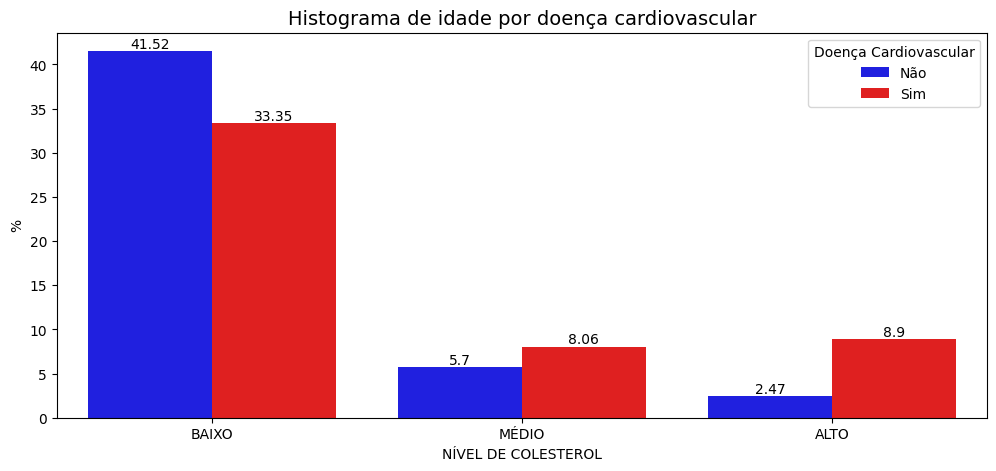

In [9]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(
    data=df,
    x="CHOLESTEROL",
    hue="CARDIO_DISEASE",
    stat="percent",
    palette=["blue", "red"]
)


plt.xticks([0, 1, 2], ["BAIXO", "MÉDIO", "ALTO"])
ax.legend(title="Doença Cardiovascular", labels=["Não", "Sim"])

plt.title("Histograma de idade por doença cardiovascular", fontsize=14)
plt.ylabel("%")
plt.xlabel("NÍVEL DE COLESTEROL")

for container in ax.containers:
    ax.bar_label(container)

plt.show()


**ANÁLISE POR NÍVEL DE COLESTEROL**

- **BAIXO:** Temos a presença de mais pessoas SEM doenças cardiovasculares (SDC) em comparação com pessoas COM doenças cardiovasculares (CDC). Diferença de 8.17%.
- **MÉDIO:** O grupo CDC supera com uma margem pequena, 2.36%, o grupo SDC. 
- **ALTO:** O grupo CDC supera com uma margem grande o grupo SDC proporcionalmente. Vale destacar também que o grupo de colesterol alto é o menor grupo em nível de colesterol, representando apenas 11.37% do total.

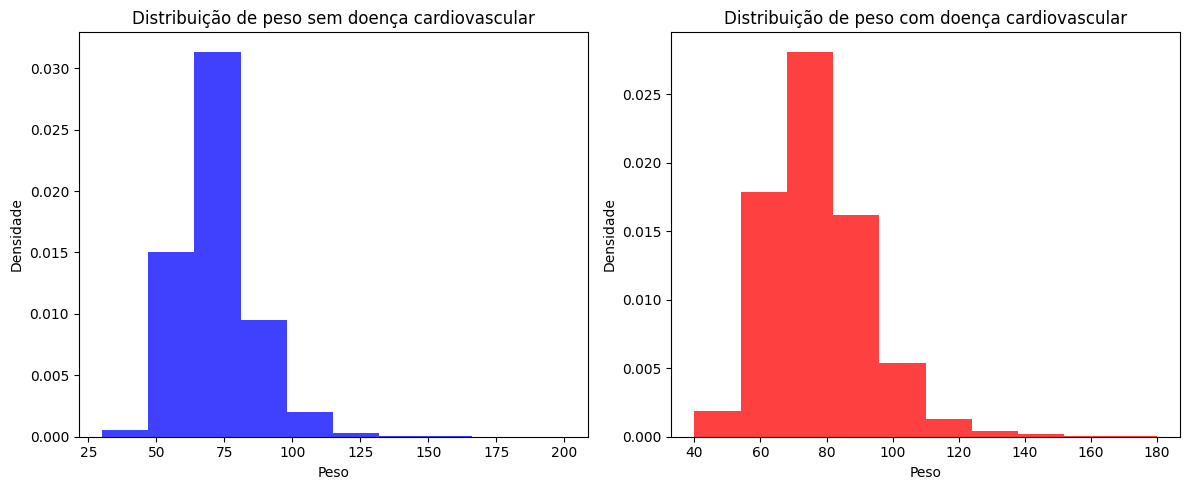

In [10]:
# DISTRIBUIÇÃO DE IDADE ABAIXO DA RENDA MÉDIA
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.hist(
    df[df['CARDIO_DISEASE'] == 0]['WEIGHT'], color='blue', alpha=0.75, density=True, bins=10)
plt.title("Distribuição de peso sem doença cardiovascular") #MUDAR TÍTULO
plt.xlabel("Peso")
plt.ylabel("Densidade")

# DISTRIBUIÇÃO DE IDADE ACIMA DA RENDA MÉDIA
plt.subplot(1,2,2)
plt.hist(df[df['CARDIO_DISEASE'] == 1]['WEIGHT'], color='red', alpha=0.75, density=True, bins=10)
plt.title("Distribuição de peso com doença cardiovascular")
plt.xlabel("Peso")
plt.ylabel("Densidade")

plt.tight_layout()


In [11]:
print("Média de peso para pessoas SEM doença cardiovascular:", df[df['CARDIO_DISEASE'] == 0]['WEIGHT'].mean().round(2))
print("Média de peso para pessoas COM doença cardiovascular:", df[df['CARDIO_DISEASE'] == 1]['WEIGHT'].mean().round(2))

Média de peso para pessoas SEM doença cardiovascular: 71.62
Média de peso para pessoas COM doença cardiovascular: 76.96


**ANÁLISE**

Primeiro, podemos notar qeu pessoas CDV tem uma média de peso MAIOR em comparação com pessoas SDV. ALém disso, nota-se que a concentração de cada um é diferente. Em relação a pessoas SDV temos uma concentração maior na faixa de 50-75. Enquanto para pessoas CDV, temos uma maior concentração em 60-100.

## 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



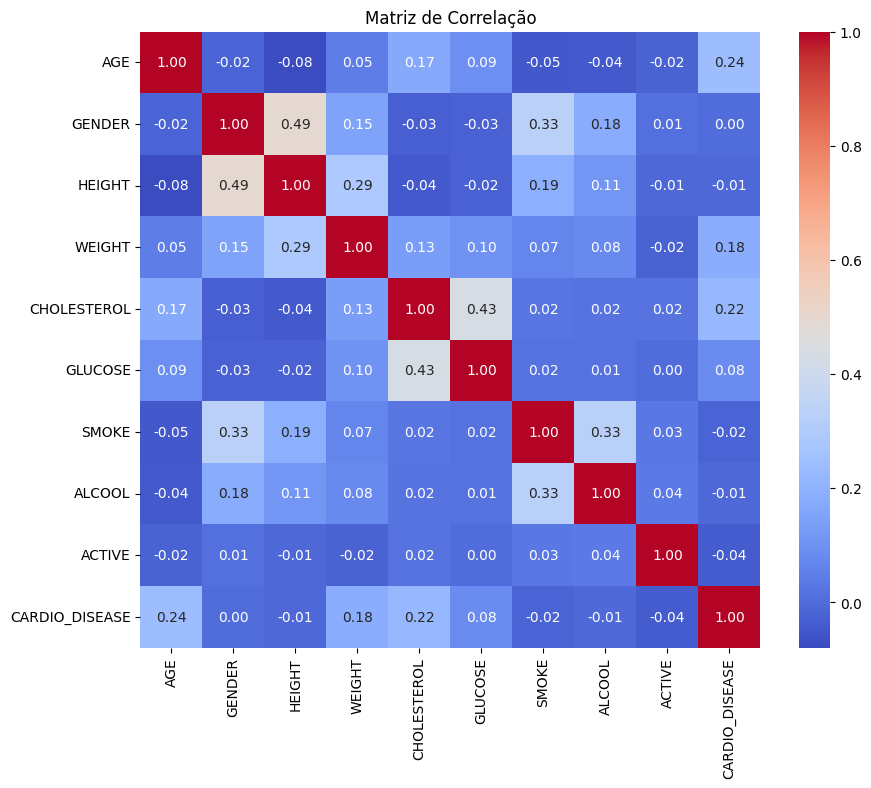

In [12]:
# MATRIZ DE CORRELAÇÃO DO DATAFRAME ORIGINAL

correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

A partir da matriz de correlação, podemos notar que os principais fatores que influenciam a presença de doenças cardiovasculares (nossa variável de interesse) são:
1. AGE (+0.24)
2. CHOLESTEROL (+0.22)
3. WEIGHT (+0.18)

**OBSERVAÇÃO:** Apesar do exercício estar pedindo quais variáveis tem maior relação, optei por destacar aquelas que são importantes para a formação do modelo. Contudo, para não deixar a tarefa incompleta, segue as três variáveis com maior relação:
1. GENDER / HEIGHT (+0.49)
2. GLUCOSE / CHOLESTEROL (+0.43)
3. ALCOOL / SMOKE (+0.33)

# 4) Essa é a sua última etapa pré modelo. Você deve:

### A) Separar a base em treino e teste.

In [13]:
# SEPARAÇÃO DE BASE DE TREINO E TESTE

X = df.drop('CARDIO_DISEASE', axis=1)
y = df['CARDIO_DISEASE'].astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

### B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.


In [14]:
# ANÁLISE ESTATÍSTICA DA COLUNA 'AGE'

print("Análise da coluna 'AGE'")
print(X_train['AGE'].describe().round(2), "\n")
print("Coeficiente de variação da coluna 'AGE':", (X_train['AGE'].std() / X_train['AGE'].mean()).round(2), "\n")

Análise da coluna 'AGE'
count    7500.00
mean       53.31
std         6.77
min        30.00
25%        48.00
50%        54.00
75%        58.00
max        65.00
Name: AGE, dtype: float64 

Coeficiente de variação da coluna 'AGE': 0.13 



In [15]:
# ANÁLISE ESTATÍSTICA DA COLUNA 'HEIGHT'

print("Análise da coluna 'HEIGHT'")
print(X_train['HEIGHT'].describe().round(2), "\n")
print("Coeficiente de variação da coluna 'HEIGHT':", (X_train['HEIGHT'].std() / X_train['HEIGHT'].mean()).round(2), "\n")

Análise da coluna 'HEIGHT'
count    7500.00
mean      164.26
std         8.14
min        70.00
25%       159.00
50%       165.00
75%       170.00
max       198.00
Name: HEIGHT, dtype: float64 

Coeficiente de variação da coluna 'HEIGHT': 0.05 



In [16]:
# ANÁLISE ESTATÍSTICA DA COLUNA 'WEIGHT'

print("Análise da coluna 'WEIGHT'")
print(X_train['WEIGHT'].describe().round(2), "\n")
print("Coeficiente de variação da coluna 'WEIGHT':", (X_train['WEIGHT'].std() / X_train['WEIGHT'].mean()).round(2), "\n")

Análise da coluna 'WEIGHT'
count    7500.00
mean       74.19
std        14.51
min        40.00
25%        65.00
50%        72.00
75%        82.00
max       200.00
Name: WEIGHT, dtype: float64 

Coeficiente de variação da coluna 'WEIGHT': 0.2 



**ANÁLISE**

A partir do cálculo de [coeficiente de variação](https://pt.wikipedia.org/wiki/Coeficiente_de_varia%C3%A7%C3%A3o) de cada variável, classificamos:
- `AGE` -> moderado (padronizaremos)
- `HEIGHT` -> baixo (não padronizaremos)
- `WEIGHT` -> alto (padronizaremos)



In [17]:
num_cols = ["AGE","WEIGHT"]

sc = StandardScaler()

X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])


In [18]:
X_train.head(3)

,AGE,GENDER,HEIGHT,WEIGHT,CHOLESTEROL,GLUCOSE,SMOKE,ALCOOL,ACTIVE
2967,0.101191,2,170,1.640495,1,3,0,1,1
700,-1.965529,1,163,-0.220052,1,1,0,0,1
3481,-0.636924,2,176,0.744676,2,2,0,0,0


###  C) Verifique se os dados estão balanceados, se não, faça o balanceamento.



In [19]:
# VERIFICAÇÃO DE BALANCEAMENTO

print("Distribuição de y_train:")
print(y_train.value_counts())

Distribuição de y_train:
CARDIO_DISEASE
1    3781
0    3719
Name: count, dtype: int64


**COMENTÁRIO**

Apesar da diferença ser pequena, optei por realizar o balanceamento para melhorar a precisão do modelo.

In [20]:
# REALIZANDO O BALANCEAMENTO COM SMOTE
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [21]:
# CONFIRMAÇÃO DE BALANCEAMENTO

print("Distribuição de y_train:")
print(y_train_balanced.value_counts())

Distribuição de y_train:
CARDIO_DISEASE
0    3781
1    3781
Name: count, dtype: int64


### D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [22]:
# VERIFICAÇÃO DE TAMANHO DOS CONJUNTOS DE TREINO E TESTE

print("Tamanho de X_train:", X_train_balanced.shape)
print("Tamanho de y_train:", y_train_balanced.shape)

print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (7562, 9)
Tamanho de y_train: (7562,)
Tamanho de X_test: (2500, 9)
Tamanho de y_test: (2500,)


In [23]:
X_train_balanced.head(3)

,AGE,GENDER,HEIGHT,WEIGHT,CHOLESTEROL,GLUCOSE,SMOKE,ALCOOL,ACTIVE
0,0.101191,2,170,1.640495,1,3,0,1,1
1,-1.965529,1,163,-0.220052,1,1,0,0,1
2,-0.636924,2,176,0.744676,2,2,0,0,0


In [24]:
y_train_balanced.head(3)

0    0
1    1
2    0
Name: CARDIO_DISEASE, dtype: int64

In [25]:
X_test.head(3)

,AGE,GENDER,HEIGHT,WEIGHT,CHOLESTEROL,GLUCOSE,SMOKE,ALCOOL,ACTIVE
9394,1.577419,1,160,1.364858,2,2,0,0,0
898,-1.079792,1,156,-0.840234,1,1,0,0,1
2398,0.396436,1,160,-1.529325,1,1,0,0,0


In [26]:
y_test.head(3)

9394    1
898     0
2398    0
Name: CARDIO_DISEASE, dtype: int64

**ANÁLISE**

A partir da exposição dos dados acima, podemos garantir que o modelo está adequado.

## 5) Realize a etapa de treinamento do modelo:

### A) Faça o treinamento do modelo.

In [27]:
logistic_cardio_disease = LogisticRegression(random_state = 0)
logistic_cardio_disease.fit(X_train_balanced, y_train_balanced)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

### B) Traga o intercept e os coeficientes.

In [28]:
logistic_cardio_disease.intercept_

array([1.44137756])

In [29]:
logistic_cardio_disease.coef_

array([[ 0.4272217 ,  0.07394998, -0.01245701,  0.39098015,  0.61643829,
        -0.1075246 , -0.12267538, -0.04801307, -0.22244522]])

**OBSERVAÇÃO**

A fim de extrair mais do exercício, vou eliminar as colunas que tem uma menor correlação e criar um modelo altenativo. Realizarei a comparação com o modelo original (completo)

In [30]:
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,CHOLESTEROL,GLUCOSE,SMOKE,ALCOOL,ACTIVE,CARDIO_DISEASE
0,50,2,168,62.0,1,1,0,0,1,0
1,55,1,156,85.0,3,1,0,0,1,1
2,52,1,165,64.0,3,1,0,0,0,1
3,48,2,169,82.0,1,1,0,0,1,1
4,48,1,156,56.0,1,1,0,0,0,0


In [31]:
# CRIAÇÃO DE MODELO ALTERNATIVO

df_alt = df[['AGE', 'WEIGHT', 'CHOLESTEROL', 'CARDIO_DISEASE']]

X_alt = df_alt.drop('CARDIO_DISEASE', axis=1)
y_alt = df_alt['CARDIO_DISEASE'].astype('int64')
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y_alt,test_size=0.25, random_state=0)

X_train_alt[num_cols] = sc.fit_transform(X_train_alt[num_cols])
X_test_alt[num_cols] = sc.transform(X_test_alt[num_cols])

# BALANCEAMENTO
smote = SMOTE(random_state=0)
X_train_balanced_alt, y_train_balanced_alt = smote.fit_resample(X_train_alt, y_train_alt)

# CRIAÇÃO DO MODELO ALTERNATIVO
logistic_cardio_disease_alt = LogisticRegression(random_state = 0)
logistic_cardio_disease_alt.fit(X_train_balanced_alt, y_train_balanced_alt)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",0
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [32]:
logistic_cardio_disease_alt.intercept_

array([-0.77609832])

In [33]:
logistic_cardio_disease_alt.coef_

array([[0.43483   , 0.35656479, 0.57686464]])

### C) Avalie as métricas do modelo treinado


In [ ]:
# MÉTRICAS - MODELO COMPLETO (TREINO)

previsoes = logistic_cardio_disease.predict(X_train_balanced)
relatorio_treino = classification_report(y_train_balanced, previsoes)
print("Relatório de Classificação:")
print(relatorio_treino)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66      3781
           1       0.65      0.61      0.63      3781

    accuracy                           0.64      7562
   macro avg       0.64      0.64      0.64      7562
weighted avg       0.64      0.64      0.64      7562



In [35]:
# MÉTRICAS - MODELO ALTERNATIVO (TREINO)

previsoes_alt = logistic_cardio_disease_alt.predict(X_train_balanced_alt)

relatorio_treino_alt = classification_report(y_train_balanced_alt, previsoes_alt)
print("Relatório de Classificação:")
print(relatorio_treino_alt)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      3781
           1       0.65      0.61      0.63      3781

    accuracy                           0.64      7562
   macro avg       0.64      0.64      0.64      7562
weighted avg       0.64      0.64      0.64      7562



**ANÁLISE**

A partir das tabelas acima, podemos concluir os seguintes insights:
- Ambos os modelos atingiram um resultado razoável em todas as métricas. Em todas elas, conseguimos uma faixa próxima de 0.60-0.68.
- Vale ressaltar que o modelo alternativo, conseguiu resultados iguais, com excessão do f1-score, em todas as métricas. Fazendo do modelo alternativo uma ótima otimização do modelo original.

## 6) Teste seu modelo

### A) Aplique o modelo aos dados de teste.

In [36]:
y_pred_test = logistic_cardio_disease.predict(X_test)
y_pred_test_alt = logistic_cardio_disease_alt.predict(X_test_alt)

### B) Avalie as métricas do modelo treinado


In [37]:
# MÉTRICAS - MODELO COMPLETO (TESTE)
relatorio_test = classification_report(y_test, y_pred_test)
print("Relatório de Classificação:")
print(relatorio_test)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      0.66      0.64      1250
           1       0.63      0.58      0.61      1250

    accuracy                           0.62      2500
   macro avg       0.62      0.62      0.62      2500
weighted avg       0.62      0.62      0.62      2500



In [38]:
# MÉTRICAS - MODELO ALTERNATIVO (TESTE)

relatorio_test_alt = classification_report(y_test_alt, y_pred_test_alt)
print("Relatório de Classificação:")
print(relatorio_test_alt)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1250
           1       0.64      0.60      0.62      1250

    accuracy                           0.63      2500
   macro avg       0.63      0.63      0.63      2500
weighted avg       0.63      0.63      0.63      2500



**ANÁLISE**

A partir dos dados, podemos destacar os seguintes insights:
- Podemos notar que que os resultados para o teste preservaram a faixa de 0.6-0.67 que o modelo de treino
- Além disso, podemos destacar que o modelo alternativo obteve melhores resultados (mesmo que a diferença sendo pequena) que o modelo original.


### C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [39]:
# AUC - MODELO COMPLETO 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)
print("AUC:", round(roc_auc, 3))

# AUC - MODELO ALTERNATIVO
fpr_alt, tpr_alt, thresholds_alt = roc_curve(y_test_alt, y_pred_test_alt)
roc_auc_alt = roc_auc_score(y_test_alt, y_pred_test_alt)
print("AUC ALT:", round(roc_auc_alt, 3))


AUC: 0.622
AUC ALT: 0.629


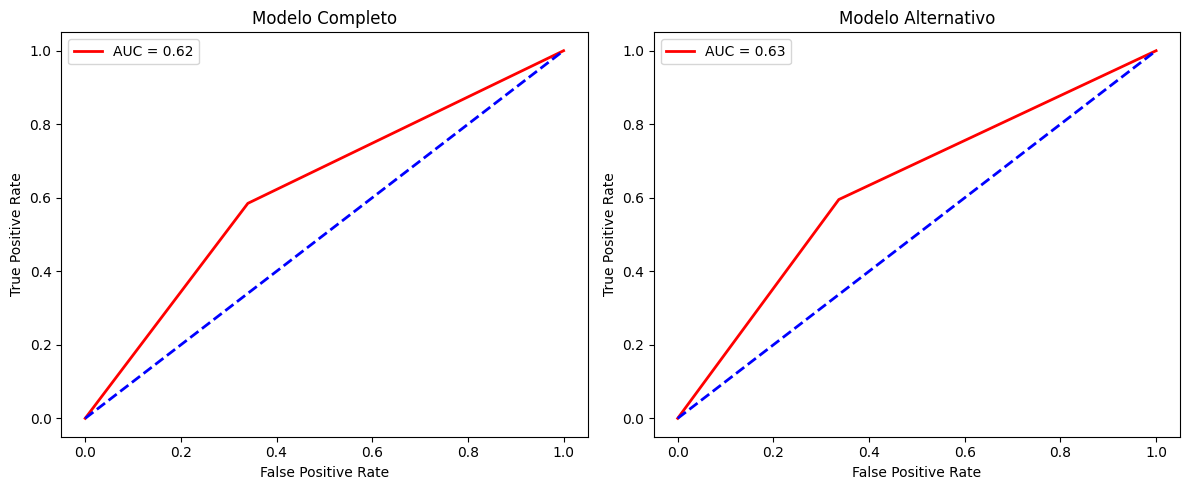

In [40]:
# GRÁFICO DE AUC-ROC PARA OS DOIS MODELOS
plt.figure(figsize=(12, 5))

# Primeiro gráfico
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}', color='red')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modelo Completo')
plt.legend()

# Segundo gráfico
plt.subplot(1, 2, 2)
plt.plot(fpr_alt, tpr_alt, lw=2, label=f'AUC = {roc_auc_alt:.2f}', color='red')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modelo Alternativo')
plt.legend()

plt.tight_layout()
plt.show()


**ANÁLISE**

Através dos dois gráficos, podemos concluir que o gráfico confirma os dados obtidos no relatório de métricas dos dois modelos. O desempenho de ambos os modelos é razoável, próximo de 0.62. Lembrando que a curva ROC-AUC diz respeito a classificação dos dados do modelo e quanto maior a área entre as curvas, melhor o modelo classifica


## 7) Explique

### A) Explique com suas palavras regressão logistica.


A regressão logistíca é um modelo supervisionado de classificação que estima probabilidade usando a função signoide

### B) Explique porque a regressão logistica é um modelo de classificação.

O modelo de regressão logística é um modelo de classificação, pois ele tem como objetivo rotular determinado dado. Assim, como mencionado na resposta acima, o modelo realiza a classificação com base na probabilidade estimada.

### C) Explique quais pontos em comum a regressão logistica tem da regressão linear.

Tanto o modelo de regressão logística quanto o modelo de regressão linear baseiam-se na definição de coeficientes para o cumprimento do objetivo do modelo. Contudo, enquanto o primeiro utiliza a função sigmoide como base e probabilidade, o segundo baseia-se no cálculo de combinação linear.